from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/강의자료/머신러닝기초/3일차_회귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 불러오기 : 자전거 대여량 수요 예측

In [2]:
df = pd.read_csv('./datasets/bike_train.csv')
pd.set_option('display.max_columns', len(df.columns))
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


주요 컬럼 설명
- datetime: hourly date + timestamp
- season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날
- workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
- weather: 1 = 맑음, 약간 구름 낀 흐림 2 = 안개, 안개 + 흐림 3 = 가벼운 눈, 가벼운 비 + 천둥 4 = 심한 눈/비, 천둥/번개
- temp: 온도(섭씨)
- atemp: 체감온도(섭씨)
- humidity: 상대습도
- windspeed: 풍속
- casual: 사전에 등록되지 않는 사용자가 대여한 횟수
- registered: 사전에 등록된 사용자가 대여한 횟수
- count: 대여 횟수

자전거 대여 횟수(Y) 예측을 위해 X를 만들어 모델에 적용해보세요!

In [3]:
# TODO : 데이터 전처리 자유롭게

In [4]:
df.isnull().sum() #널값 없음.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df.info() # datetime이 오브젝트...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df=df.drop(['casual','registered'],axis=1) # 결과값이니까 삭제

In [7]:
len(df['datetime'].unique())

10886

In [8]:
df.sort_values('datetime')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [9]:
# 날짜 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['datetime'])
df['datetime_numbering'] = encoder.transform(df['datetime'])

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,datetime_numbering
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


In [11]:
df=df.drop('datetime',axis=1)

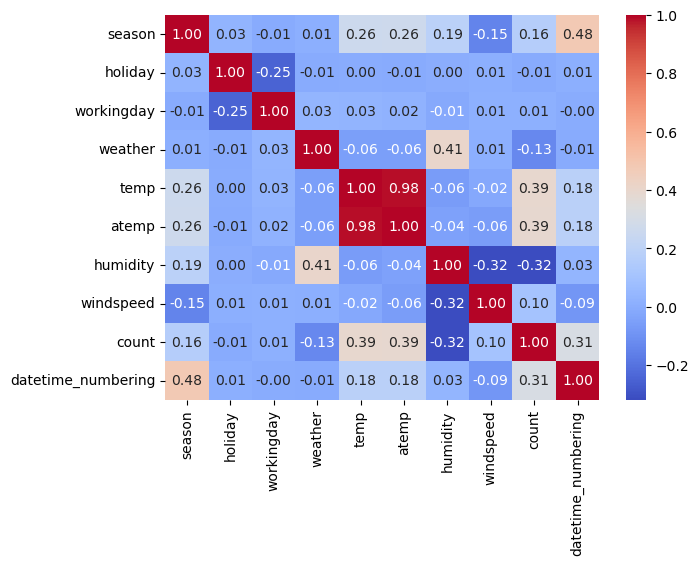

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
float_df=df.loc[:,'season':]
plt.figure(figsize = (7, 5))
sns.heatmap(float_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

-> 온도와 체감 온도가 상관관계가 높음    

In [13]:
# 사람이 느끼는 것은 체감온도이므로 temp를 버려보자
df=df.drop('temp',axis=1) #temp가 있으면 오차 22490, temp가 없으면 오차 22472

In [14]:
# 상관관계가 낮은 컬럼을 버려보자.(둘 중 하나만)
df=df.drop('workingday',axis=1) # workingday버리면 22465 있으면 22472
# df=df.drop('holiday',axis=1) #  버리면 22475, 있으면 22472 =>필요한 데이터

In [15]:
# 생각하기에 둘이 유사해보이니까 둘 중 하나를 버리자
df=df.drop('season',axis=1) # 버리면 22427, 있으면 22465
# df=df.drop('datetime_numbering',axis=1) # 버리면 오히려 오차증가. 필요데이터

In [16]:
# df=df.drop('humidity',axis=1) # 버리면 24797 오차증가. 필요데이터
# df=df.drop('weather',axis=1) # 버리면 22438, 있으면 22427 . 필요데이터

In [17]:
df.columns

Index(['holiday', 'weather', 'atemp', 'humidity', 'windspeed', 'count',
       'datetime_numbering'],
      dtype='object')

### 모델 적용 / 평가

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['count']
X = df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_reg = LinearRegression()

In [20]:
lr_reg.fit(X_train, y_train)
ln_pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,ln_pred)

RMSE: 149.760, MAE: 113.086


In [21]:
# 점수가 너무 높음
# 다른 모델 적용(현재 LinearRegression -> PolynomialFeatures)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=9, include_bias=False)

In [23]:
len(X_train.to_numpy()[0])

6

In [24]:
poly_features.fit_transform(X_train.to_numpy())

array([[0.00000000e+00, 1.00000000e+00, 3.25750000e+01, ...,
        1.98740406e+27, 4.85149531e+29, 1.18430908e+32],
       [0.00000000e+00, 1.00000000e+00, 3.86350000e+01, ...,
        1.04520218e+30, 5.31766185e+32, 2.70546007e+35],
       [0.00000000e+00, 1.00000000e+00, 1.43950000e+01, ...,
        2.50846316e+29, 1.04084567e+32, 4.31881852e+34],
       ...,
       [0.00000000e+00, 1.00000000e+00, 3.10600000e+01, ...,
        7.02755723e+30, 2.47100109e+33, 8.68843356e+35],
       [0.00000000e+00, 2.00000000e+00, 1.74250000e+01, ...,
        1.38671246e+30, 1.66425222e+33, 1.99733941e+36],
       [0.00000000e+00, 1.00000000e+00, 3.56050000e+01, ...,
        4.10135086e+26, 5.89693838e+28, 8.47864116e+30]])

In [25]:
len(poly_features.fit_transform(X_train.to_numpy())[0])

5004

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.to_numpy(), y_train)

LinearRegression()

In [27]:
print(lin_reg.intercept_) # y절편
print(lin_reg.coef_)# 계수

101.09877139012065
[-6.33957752  3.06659584  7.1274294  -2.8349663   0.88244583  0.01500857]


In [28]:
np.linspace(-3, 3, 90).reshape(-1, 9)

array([[-3.        , -2.93258427, -2.86516854, -2.79775281, -2.73033708,
        -2.66292135, -2.59550562, -2.52808989, -2.46067416],
       [-2.39325843, -2.3258427 , -2.25842697, -2.19101124, -2.12359551,
        -2.05617978, -1.98876404, -1.92134831, -1.85393258],
       [-1.78651685, -1.71910112, -1.65168539, -1.58426966, -1.51685393,
        -1.4494382 , -1.38202247, -1.31460674, -1.24719101],
       [-1.17977528, -1.11235955, -1.04494382, -0.97752809, -0.91011236,
        -0.84269663, -0.7752809 , -0.70786517, -0.64044944],
       [-0.57303371, -0.50561798, -0.43820225, -0.37078652, -0.30337079,
        -0.23595506, -0.16853933, -0.1011236 , -0.03370787],
       [ 0.03370787,  0.1011236 ,  0.16853933,  0.23595506,  0.30337079,
         0.37078652,  0.43820225,  0.50561798,  0.57303371],
       [ 0.64044944,  0.70786517,  0.7752809 ,  0.84269663,  0.91011236,
         0.97752809,  1.04494382,  1.11235955,  1.17977528],
       [ 1.24719101,  1.31460674,  1.38202247,  1.4494382 ,  1

In [29]:
poly_pred=lin_reg.predict(X_test.to_numpy())

In [30]:
evaluate_regr(y_test ,poly_pred)

RMSE: 149.760, MAE: 113.086


In [31]:
# 다항회귀나 선형회귀의 오차가 같게 나오는 중

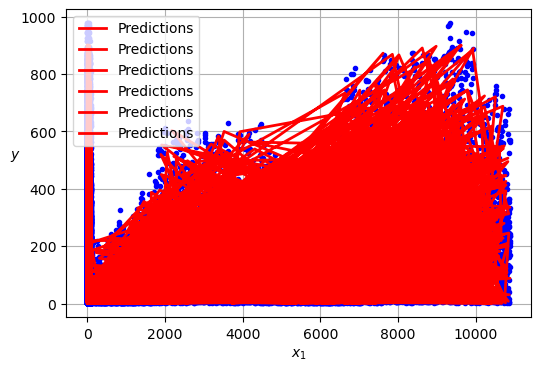

In [32]:
# 함수 시각화 ㅇㅁㅇ 비...비슷한거 아닌가
plt.figure(figsize=(6, 4))
plt.plot(X_train.to_numpy(), y_train, "b.")
plt.plot(X_test, y_test, "r-", linewidth=2, label="Predictions")  # 2차 함수 그래프
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
# plt.axis([0, 10, 0, 10])
plt.grid()
plt.show()

In [33]:
# 스케일링

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 3662 to 2732
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             8708 non-null   int64  
 1   weather             8708 non-null   int64  
 2   atemp               8708 non-null   float64
 3   humidity            8708 non-null   int64  
 4   windspeed           8708 non-null   float64
 5   datetime_numbering  8708 non-null   int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 442.2 KB


In [37]:
for col in X_train.columns:
    print(col,min(X_train[col])-max(X_train[col]))

holiday -1
weather -3
atemp -43.18
humidity -100
windspeed -56.9969
datetime_numbering -10884


In [38]:
X_train.columns

Index(['holiday', 'weather', 'atemp', 'humidity', 'windspeed',
       'datetime_numbering'],
      dtype='object')

In [39]:
# 간격이 너무 크니까 간격을 바꾸자
data_scaled = scaler.fit_transform(X_train[['datetime_numbering']])

In [40]:
X_train=data_scaled
X_train

array([[-0.56092234],
       [ 1.02393608],
       [ 0.51694668],
       ...,
       [ 1.40441653],
       [ 1.70765659],
       [-0.85653372]])

In [41]:
test_data_scaled = scaler.fit_transform(X_test[['datetime_numbering']])
X_test=test_data_scaled
X_test

array([[ 0.36200353],
       [ 0.78947893],
       [ 0.13084069],
       ...,
       [ 0.86685294],
       [ 0.13116042],
       [-0.28000889]])

In [42]:
new_l = LinearRegression()

new_l.fit(X_train, y_train)
pred = new_l.predict(X_test)

evaluate_regr(y_test ,pred)

RMSE: 171.883, MAE: 132.666


In [43]:
# 스케일링 하기 전의 오차가 더 작음

In [44]:
answer=pd.DataFrame(data=[np.array(y_test), ln_pred])
answer

,0,1,2,3,4,5,...,2172,2173,2174,2175,2176,2177
0,244.00000,239.00000,229.00000,467.000000,335.000000,40.000000,...,7.000000,340.000000,4.000000,627.000000,450.000000,75.000000
1,245.61324,201.96076,215.75629,342.418735,245.577757,189.553625,...,157.046358,179.455908,128.715132,410.078594,220.159186,74.429987
